# <font color='#eb3483'>PCA exercise</font>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

For this first exercise we are going to use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), a classic one. Make sure you read the documentation for the dataset and explore it to make sure you know how to tackle the exercise.

We load the dataset

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [6]:
mnist.data.shape

(70000, 784)

The dataset consists off 70000 images of handwritten digits, each one 28x28 pixels in black and white (0 being absolute black and 255 being absolute white). For convenience scikit-learn provides them as an array of 784 elements (28 x 28).

In [7]:
digit = mnist.data[0]

In [8]:
digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
digit.shape

(784,)

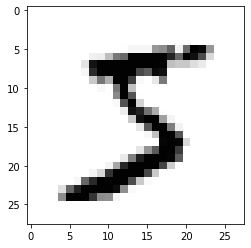

In [10]:
plt.imshow(digit.reshape(28,28), cmap="Greys");

To speed things up, we will get a sample of 10000 observations. We set Numpy's random seed for reproducibility.

In [11]:
import numpy as np

In [12]:
sample_size = 10000
np.random.seed(42)
random_sample_index = np.random.randint(0, mnist.data.shape[0], sample_size)
random_sample_index

array([15795,   860, 54886, ..., 49222, 48115, 40647])

In [13]:
mnist_sample_data = mnist.data[random_sample_index]
mnist_sample_target = mnist.target[random_sample_index]

### <font color='#eb3483'>Exercise</font>

Use PCA to reduce the mnist sample dimensionality and create a classifier that correctly classifies the images, using as the scorer the F1 score (there are multiple f1 scores for multiclass, choose the one you think fits best the problem, the [documentation can help](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)). The greater the f1-score the better the classifier. 
<!--A good classifier would have a F1 above 0.99-->

First we check how the target classes are distributed

In [14]:
pd.Series(mnist_sample_target).value_counts(True)

1    0.1156
7    0.1017
2    0.1017
3    0.1015
8    0.0999
6    0.0980
9    0.0974
0    0.0971
4    0.0960
5    0.0911
dtype: float64

We see there is no class imbalance, so we can use F1 micro average

Scale the data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
mnist_sample_data = scaler.fit_transform(mnist_sample_data)

Apply PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(0.8)

In [19]:
mnist_pca = pca.fit_transform(mnist_sample_data)

In [20]:
mnist_pca

array([[ 1.03907967e+01, -1.23630773e+01,  3.31352667e+00, ...,
         1.96280671e+00,  7.71974772e-01, -2.14867729e-01],
       [ 1.03672258e+01, -9.25699210e+00, -1.98309677e+00, ...,
        -1.96507031e-01,  3.48332786e-01, -3.03638249e-01],
       [-8.43079556e+00, -8.90042145e-01,  2.05460606e+00, ...,
         2.10377726e-02,  2.70538203e-01, -9.29326815e-01],
       ...,
       [-5.18654089e-01,  1.25138290e+00,  7.14945114e+00, ...,
        -1.22736471e+00, -6.72415306e-01,  1.68191417e-01],
       [-4.57313498e-01, -2.20664871e+00, -9.80935474e-01, ...,
        -4.82266853e-01, -7.14119409e-01, -4.71904286e-01],
       [ 1.04187644e+00, -2.46688209e+00, -9.85088034e+00, ...,
        -1.83735194e-01, -9.36201908e-03, -9.86507885e-02]])

Apply logistic regression to transformed data

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="lbfgs", # handle L2 or no penalty
                         max_iter=2000,  # maximum #iterations for solver to converge
                         dual=False)     # when sample_size > number_features

Measure performance

In [22]:
from sklearn.model_selection import cross_val_score
clf_results = cross_val_score(clf,
                              mnist_pca,
                              mnist_sample_target,
                              scoring="f1_micro",
                              cv=10
                             )


In [23]:
clf_results.mean()

0.9141